# Working with dates and times in Python

In [2]:
from datetime import date
from datetime import datetime
import pandas as pd

In [10]:
#create dates
my_date = date(1992,12,31)
print(my_date)

1992-12-31


In [11]:
print([my_date.isoformat()]) #YYYY-MM-DD

['1992-12-31']


In [17]:
print(my_date.strftime('Year is %Y/%m/%d'))

Year is 1992/12/31


In [22]:
my_date.strftime('%B of %Y')

'December of 1992'

In [21]:
my_date.strftime('%Y-%j')

'1992-366'

In [26]:
dt = datetime(2002,1,7,3,0,0)
print(dt)

2002-01-07 03:00:00


In [4]:
data = pd.read_csv('CSV/capital-onebike.csv',parse_dates=['Start date','End date'])
data

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member
...,...,...,...,...,...,...,...,...
285,2017-12-29 14:32:55,2017-12-29 14:43:46,31242,18th St & Pennsylvania Ave NW,31265,5th St & Massachusetts Ave NW,W20529,Member
286,2017-12-29 15:08:26,2017-12-29 15:18:51,31265,5th St & Massachusetts Ave NW,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,W20529,Casual
287,2017-12-29 20:33:34,2017-12-29 20:38:13,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31618,4th & East Capitol St NE,W20529,Member
288,2017-12-30 13:51:03,2017-12-30 13:54:33,31618,4th & East Capitol St NE,31610,Eastern Market / 7th & North Carolina Ave SE,W20529,Member


In [31]:
print(dt.strftime('%Y-%m-%d %H:%M:%S'))

2002-01-07 03:00:00


In [32]:
dt.isoformat()

'2002-01-07T03:00:00'

In [35]:
new = datetime.strptime("30/12/2017 15:19:13","%d/%m/%Y %H:%M:%S")
print(new)

2017-12-30 15:19:13


In [37]:
first_start = datetime(2017, 10, 1, 15, 23, 25)

# Format to feed to strftime()
fmt = "%Y-%m-%dT%H:%M:%S"

print(first_start.isoformat())
print(first_start.strftime(fmt))

2017-10-01T15:23:25
2017-10-01T15:23:25


In [38]:
from datetime import timedelta,timezone

In [39]:
time = timezone(timedelta(hours=-5))
dt = datetime(2021,7,12,14,56,tzinfo=time)
dt

datetime.datetime(2021, 7, 12, 14, 56, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400)))

In [40]:
print(dt) # after -05:00 is our timezone

2021-07-12 14:56:00-05:00


In [41]:
#Indias timezone
IST = timezone(timedelta(hours=5,minutes=30))
print(dt.astimezone(IST))

2021-07-13 01:26:00+05:30


In [42]:
#change original to match UTC in India
print(dt.astimezone(timezone.utc))

2021-07-12 19:56:00+00:00


In [43]:
# Create a timezone for Australian Eastern Daylight Time, or UTC+11
aedt = timezone(timedelta(hours=11))

# October 1, 2017 at 15:26:26, UTC+11
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=aedt)

print(dt.isoformat())

2017-10-01T15:26:26+11:00


In [44]:
from dateutil import tz

In [63]:
europe = tz.gettz('Europe/London')

In [64]:
last = datetime(2020,12,12,20,20,20,tzinfo=ukraine)
print(last)

2020-12-12 20:20:20+00:00


Time zone rules actually change quite frequently. IANA time zone data gets updated every 3-4 months, as different jurisdictions make changes to their laws about time or as more historical information about timezones are uncovered. tz is smart enough to use the date in your datetime to determine which rules to use historically.

When you need to move a datetime from one timezone into another, use .astimezone() and tz. 

In [65]:
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00


In [67]:
monthly_rides = data.resample('M',on = 'Start date')['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


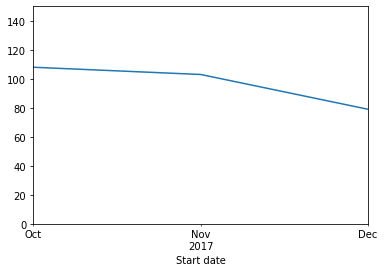

In [5]:
import matplotlib.pyplot as plt

data.resample('M', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

plt.show()

Note that, by combining grouping and resampling, you can answer a lot of questions about nearly any data set that includes time as a feature. Keep in mind that you can also group by more than one column at once.

In [72]:
data['Start date'] = data['Start date'].dt.tz_localize('America/New_York', 
                                						 ambiguous='NaT')

print(data['Start date'].iloc[0])

data['Start date'] = data['Start date'].dt.tz_convert('Europe/London')

print(data['Start date'].iloc[0])

2017-10-01 15:23:25-04:00
2017-10-01 20:23:25+01:00


Nicely done! dt.tzconvert() converts to a new timezone, whereas dt.tzlocalize() sets a timezone in the first place. You now know how to deal with datetimes in Pandas

There are .dt attributes for all of the common things you might want to pull out of a datetime, such as the day, month, year, hour, and so on, and also some additional convenience ones, such as quarter and week of the year out of 52.